In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/prueba/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/prueba/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[tax bill, originally sold, little known, know...","[Baikalfinansgroup, Rosneft]",1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[tax bill, originally sold, little known, know...","[Yuganskneftegaz cost, Yuganskneftegaz cost 27...",0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[Loraine, Loraine, London, United Kingdom]",[London],1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[town girl, followed earlier, earlier films, f...","[Sennett, Extra Girl was produced Sennett ]",0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,0,0,...,"[bus collision, Uganda]","[bus collision, Uganda]",1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,0,0,...,"[grading papers, understand answers, answers w...","[Haque, Haque wants to include English in some...",0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,0,0,...,"[South African, African iron, steel manufactur...","[South African, African steel, steel manufactu...",0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,0,0,...,"[Critics said, main qualification, high school...","[NCEA, NCEA has been degraded authority ]",0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[pleaded guilty, aggravated assault, obstruct ...",[Tyler Jackson],1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


<Axes: title={'center': 'c2_estructura'}, xlabel='clases'>

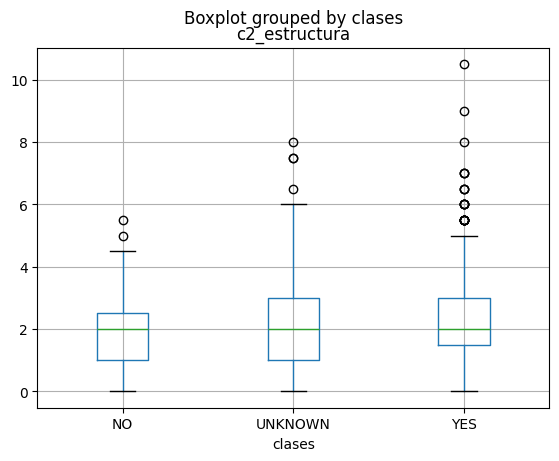

In [4]:
train.boxplot(by="clases",column="c2_estructura")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.333333,0.000000,0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.428571,0.000000,1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,0,0,...,0.000000,0.080000,1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,0,0,...,0.000000,0.038462,0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,0,0,...,0.090909,0.026316,0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,0,0,...,0.166667,0.031250,0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


In [6]:
train=train.drop(["sumas","entropia_total","distancias","max_info","similitud_faltantes","list_trigram","list_rel_con",'list_M', 'list_m', 'list_T','list_cuatrigram', 'diferencias'],axis=1)

In [7]:
#train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
#train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [8]:
#train=train.drop(["Total T"],axis=1)

In [9]:
train

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000,0.000000e+00,0.000000,0,0,0.000000,1.0,0.605426,1.5,0.241085,0.5,0.389922,1.5,YES
1,0.000,0.000000e+00,0.000000,1,1,0.600000,0.0,0.547619,3.0,0.000000,0.0,0.468254,0.5,NO
2,0.000,0.000000e+00,0.000000,1,1,0.555556,1.0,0.587589,4.5,0.000000,0.0,0.587589,4.5,UNKNOWN
3,0.000,0.000000e+00,0.000000,0,0,0.500000,0.0,0.630592,1.5,0.000000,0.0,0.630592,1.5,YES
4,1.132,2.044573e+00,0.001367,0,0,0.375000,1.0,0.569630,4.0,0.000000,0.0,0.569630,4.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.565,4.006609e+00,0.002715,0,0,0.285714,0.5,0.548077,3.5,0.000000,0.0,0.493590,3.0,UNKNOWN
796,1.688,3.952492e+00,0.002748,0,0,0.538462,0.6,0.590226,6.5,0.000000,0.0,0.525815,4.0,YES
797,0.000,1.521449e-12,0.000000,0,0,0.375000,0.0,0.546296,4.0,0.214120,0.5,0.451389,3.0,UNKNOWN
798,0.000,0.000000e+00,0.000000,0,0,0.375000,1.0,0.543771,4.0,0.000000,0.0,0.402357,2.5,NO


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura
entropias,1.000000,0.968785,0.405115,0.015218,0.046331,-0.358045,-0.330922,-0.376076,-0.059129,-0.011225,0.009174,-0.201567,-0.024655
mutinf,0.968785,1.000000,0.396825,-0.025129,0.009642,-0.317701,-0.283181,-0.330558,-0.076779,-0.029395,-0.014646,-0.178091,-0.055268
mearts,0.405115,0.396825,1.000000,0.031709,0.029556,-0.174019,-0.162223,-0.215336,-0.037548,-0.025962,-0.023562,-0.099369,-0.017760
list_comp,0.015218,-0.025129,0.031709,1.000000,0.680570,-0.239258,-0.208676,-0.177706,0.092514,0.139806,0.169083,-0.083207,0.161016
list_incomp,0.046331,0.009642,0.029556,0.680570,1.000000,-0.287405,-0.224963,-0.240256,0.071303,0.166289,0.199272,-0.132529,0.145390
list_bigram,-0.358045,-0.317701,-0.174019,-0.239258,-0.287405,1.000000,0.507265,0.626611,0.179106,0.009024,-0.017783,0.440239,0.135487
bi_ent_trip_rel,-0.330922,-0.283181,-0.162223,-0.208676,-0.224963,0.507265,1.000000,0.474141,0.082535,0.007587,-0.001739,0.239240,0.028140
Jaro-Winkler_rit,-0.376076,-0.330558,-0.215336,-0.177706,-0.240256,0.626611,0.474141,1.000000,-0.010926,-0.033546,-0.061899,0.717814,-0.016121
c_estructura,-0.059129,-0.076779,-0.037548,0.092514,0.071303,0.179106,0.082535,-0.010926,1.000000,0.160113,0.177289,0.080870,0.902256
Jaro-Winkler_contra,-0.011225,-0.029395,-0.025962,0.139806,0.166289,0.009024,0.007587,-0.033546,0.160113,1.000000,0.893709,0.035353,0.177135


<Axes: >

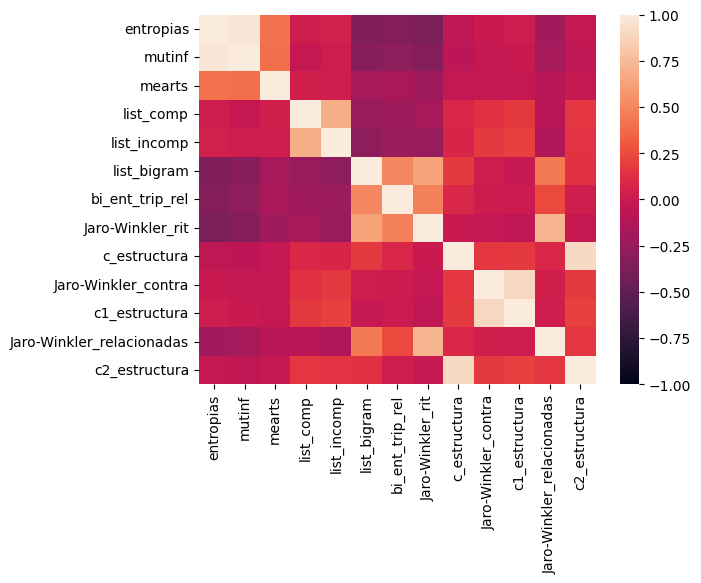

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura
entropias,1.000000,0.968785,0.405115,0.015218,0.046331,-0.358045,-0.330922,-0.376076,-0.059129,-0.011225,0.009174,-0.201567,-0.024655
mutinf,0.968785,1.000000,0.396825,-0.025129,0.009642,-0.317701,-0.283181,-0.330558,-0.076779,-0.029395,-0.014646,-0.178091,-0.055268
mearts,0.405115,0.396825,1.000000,0.031709,0.029556,-0.174019,-0.162223,-0.215336,-0.037548,-0.025962,-0.023562,-0.099369,-0.017760
list_comp,0.015218,-0.025129,0.031709,1.000000,0.680570,-0.239258,-0.208676,-0.177706,0.092514,0.139806,0.169083,-0.083207,0.161016
list_incomp,0.046331,0.009642,0.029556,0.680570,1.000000,-0.287405,-0.224963,-0.240256,0.071303,0.166289,0.199272,-0.132529,0.145390
list_bigram,-0.358045,-0.317701,-0.174019,-0.239258,-0.287405,1.000000,0.507265,0.626611,0.179106,0.009024,-0.017783,0.440239,0.135487
bi_ent_trip_rel,-0.330922,-0.283181,-0.162223,-0.208676,-0.224963,0.507265,1.000000,0.474141,0.082535,0.007587,-0.001739,0.239240,0.028140
Jaro-Winkler_rit,-0.376076,-0.330558,-0.215336,-0.177706,-0.240256,0.626611,0.474141,1.000000,-0.010926,-0.033546,-0.061899,0.717814,-0.016121
c_estructura,-0.059129,-0.076779,-0.037548,0.092514,0.071303,0.179106,0.082535,-0.010926,1.000000,0.160113,0.177289,0.080870,0.902256
Jaro-Winkler_contra,-0.011225,-0.029395,-0.025962,0.139806,0.166289,0.009024,0.007587,-0.033546,0.160113,1.000000,0.893709,0.035353,0.177135


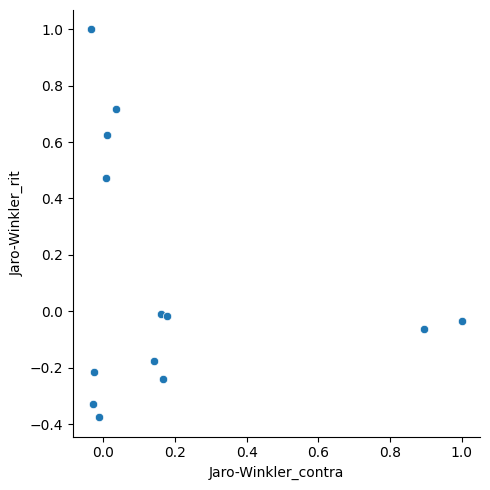

In [15]:
# Checar variables colineales
sns.relplot(data=train_m, x="Jaro-Winkler_contra", y="Jaro-Winkler_rit")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [17]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

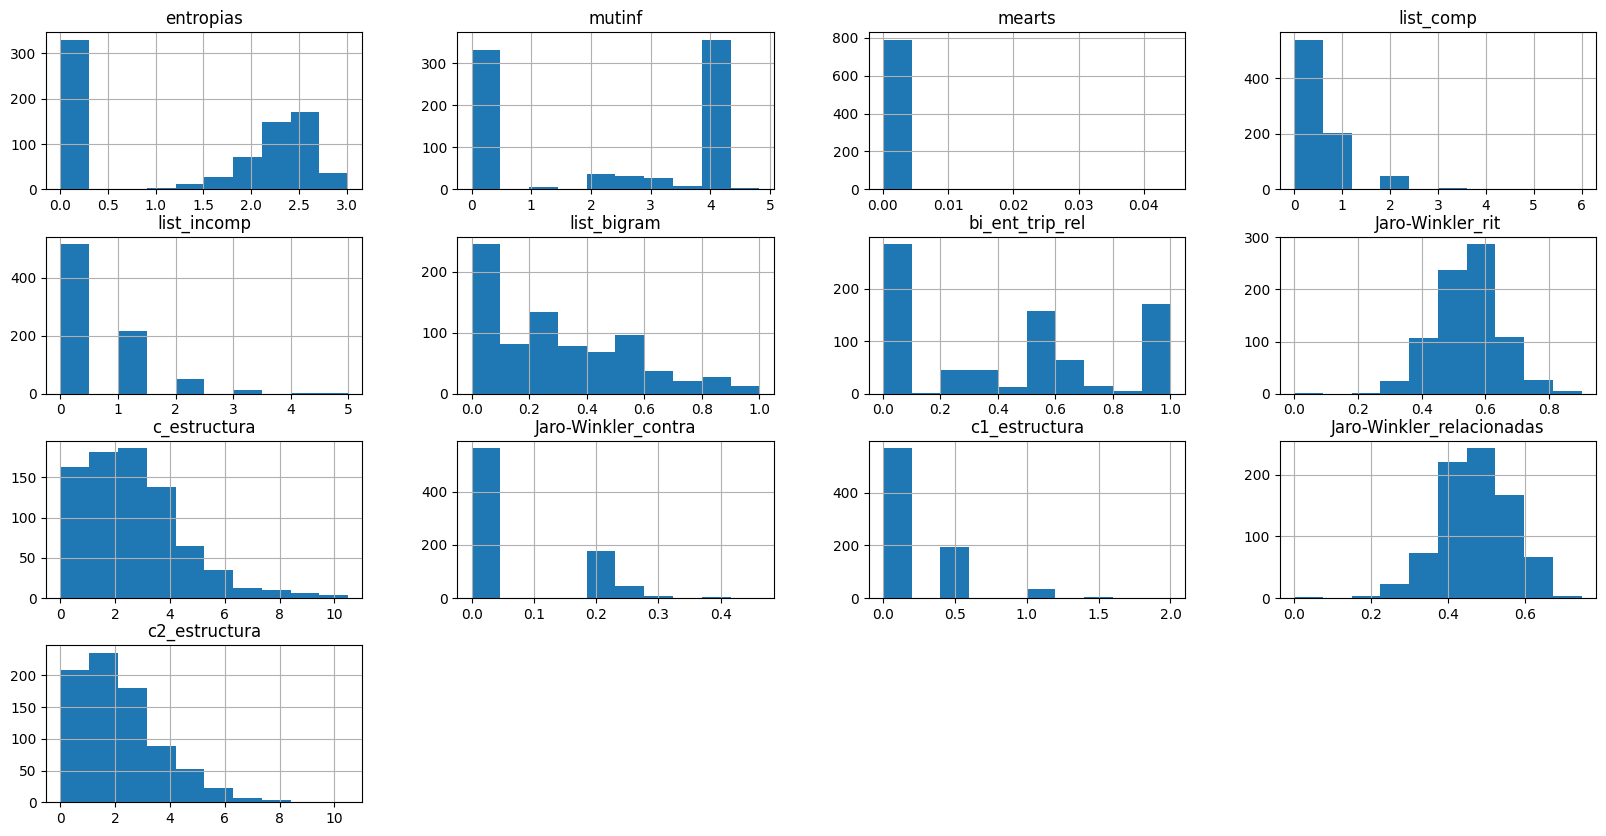

In [18]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [19]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/prueba/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/prueba/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [20]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,0,...,"[French movie, movie director, chilling tales,...","[Beau Serge, Chabrol, Beau Serge was directed ...",0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,1,1,...,"[French movie, movie director, chilling tales,...","[French movie, movie director, Le Boucher, Le ...",0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,"[Claude Chabrol, Agnes, Stéphane Audran, Auror...","[Aurore Paquiss, Chabrol, Aurore Paquiss marri...",0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[small Maoist, Maoist political, political par...","[Maoist political, political party, Michael La...",1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,0,0,...,"[small Maoist, Maoist political, political par...","[Michael Laski, China]",1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[risk destabilising, led Chinese, Chinese econ...","[led economy, China, China has economy ]",0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,"[saw exports, services rise, imports gained, U...","[exports rose, US]",0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,0,0,...,"[largest consumer, imports rose, crude hitting...","[Israel, Lebanon]",1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,0,0,...,"[Olympic site, alien presence, Forbidden City]",[Forbidden City],1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [21]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_cuatrigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000000,0.000000,2.375,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,0,...,0.000000,0.000000,0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000000,129.894150,2.224,0.000,1.521449e-12,0.000000,0.000000,0.000000,1,1,...,0.142857,0.027027,0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000000,0.000000,0.722,0.000,0.000000e+00,0.000000,0.000000,1.000000,1,1,...,0.000000,0.000000,0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000000,0.000000,2.542,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.125000,0.000000,1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,6.383789,138.847382,2.453,2.475,3.915644e+00,0.004324,0.412710,0.347696,0,0,...,0.000000,0.026316,1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.488,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000000,0.000000,2.969,0.000,0.000000e+00,0.000000,0.000000,1.000000,0,0,...,0.000000,0.000000,0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,9.458171,200.796814,2.599,2.499,3.976425e+00,0.002651,0.467463,0.482878,0,0,...,0.166667,0.023256,1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,3.272335,165.737167,2.443,1.969,3.985115e+00,0.003217,0.353093,0.263597,0,0,...,0.166667,0.037037,1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [22]:
test=test.drop(["sumas","entropia_total","distancias","max_info","similitud_faltantes","list_trigram","list_rel_con",'list_M', 'list_m', 'list_T','list_cuatrigram', 'diferencias'],axis=1)
test

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000,0.000000e+00,0.000000,1,0,0.166667,0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000,1.521449e-12,0.000000,1,1,0.333333,0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000,0.000000e+00,0.000000,1,1,0.333333,0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000,0.000000e+00,0.000000,0,0,0.500000,1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,2.475,3.915644e+00,0.004324,0,0,0.333333,1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000,0.000000e+00,0.000000,0,0,0.200000,0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000,0.000000e+00,0.000000,0,0,0.400000,0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,2.499,3.976425e+00,0.002651,0,0,0.375000,1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,1.969,3.985115e+00,0.003217,0,0,0.500000,1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [23]:
#test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
#test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [24]:
test

,entropias,mutinf,mearts,list_comp,list_incomp,list_bigram,bi_ent_trip_rel,Jaro-Winkler_rit,c_estructura,Jaro-Winkler_contra,c1_estructura,Jaro-Winkler_relacionadas,c2_estructura,clases
0,0.000,0.000000e+00,0.000000,1,0,0.166667,0.333333,0.563063,3.5,0.000000,0.0,0.434846,1.5,YES
1,0.000,1.521449e-12,0.000000,1,1,0.333333,0.750000,0.505405,4.0,0.000000,0.0,0.486873,3.0,YES
2,0.000,0.000000e+00,0.000000,1,1,0.333333,0.333333,0.570175,2.0,0.267544,0.5,0.267544,0.5,YES
3,0.000,0.000000e+00,0.000000,0,0,0.500000,1.000000,0.596491,5.5,0.000000,0.0,0.518341,4.5,YES
4,2.475,3.915644e+00,0.004324,0,0,0.333333,1.000000,0.532790,2.5,0.223058,0.5,0.433897,1.5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000,0.000000e+00,0.000000,0,0,0.200000,0.000000,0.609610,2.0,0.295796,1.0,0.609610,2.0,YES
796,0.000,0.000000e+00,0.000000,0,0,0.400000,0.500000,0.637387,1.5,0.231231,0.5,0.656156,0.0,NO
797,2.499,3.976425e+00,0.002651,0,0,0.375000,1.000000,0.503999,3.0,0.000000,0.0,0.503999,3.0,UNKNOWN
798,1.969,3.985115e+00,0.003217,0,0,0.500000,1.000000,0.611111,4.5,0.265432,1.0,0.561728,4.0,UNKNOWN


In [25]:
#test=test.drop(["Total T"],axis=1)

In [26]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [27]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [29]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [30]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [31]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e-01, 5.22384185e-01, 1.42857143e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.27325890e-01, 4.76190476e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.87200109e-01, 4.28571429e-01],
       ...,
       [0.00000000e+00, 3.15468200e-13, 0.00000000e+00, ...,
        2.50000000e-01, 6.04731526e-01, 2.85714286e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.39042740e-01, 2.38095238e-01],
       [8.35543767e-01, 8.44703819e-01, 6.75680109e-02, ...,
        0.00000000e+00, 7.44284955e-01, 1.42857143e-01]])

In [32]:
X_train.shape

(800, 13)

In [33]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [34]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.decision_function(X_train)

array([ 7.82118749e-01, -2.10326907e-01,  1.39107169e+00,  4.12741296e-01,
        1.26099856e+00,  7.99575922e-01,  3.08224021e-01,  4.40362395e-01,
       -4.90536152e-02, -3.22106471e-01,  1.55436559e-01,  1.47460917e+00,
        7.71622208e-01,  1.68481406e-01, -3.15138756e-01,  7.55967400e-01,
       -1.89378124e-01, -3.08871655e-01, -2.99605461e-01,  6.65752813e-01,
        1.16062273e+00, -2.98211219e-01,  3.93620754e-01,  3.79196701e-01,
        4.52679553e-01,  6.25806176e-01,  1.08399271e+00,  4.13389178e-01,
       -9.62350622e-02,  1.99304219e-01,  3.00082833e-01,  1.21071005e+00,
       -5.48769211e-01,  6.63519026e-01,  2.83904619e-01, -1.42297629e-01,
        5.78707014e-01,  2.19505912e-03,  2.17085482e-01,  1.14848162e+00,
        2.39673092e-01,  5.30851133e-01,  1.22017870e+00,  4.56641788e-01,
       -4.02987282e-01, -2.99780399e-01, -7.91416410e-03,  6.88547579e-01,
        7.52855265e-01,  2.73241821e-01, -1.36290204e+00,  3.58636661e-01,
        1.93970112e-01,  

In [36]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_bigram', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'c_estructura',
       'Jaro-Winkler_contra', 'c1_estructura', 'Jaro-Winkler_relacionadas',
       'c2_estructura'],
      dtype='object')

In [37]:
model.classes_

array([0, 1])

In [38]:
model.coef_[0]

array([-0.53037692,  0.00603406, -0.07465386, -0.49482006, -0.8533529 ,
        0.2906274 ,  1.0595056 ,  2.41337122,  0.78006822, -0.29650632,
        0.19442867,  1.15194332,  0.39993386])

In [39]:
coeficientes=model.coef_[0]

In [40]:
coeficientes

array([-0.53037692,  0.00603406, -0.07465386, -0.49482006, -0.8533529 ,
        0.2906274 ,  1.0595056 ,  2.41337122,  0.78006822, -0.29650632,
        0.19442867,  1.15194332,  0.39993386])

In [41]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 Jaro-Winkler_rit 4 list_incomp


In [42]:
n_columns=train.shape[1]-1

In [43]:
n_columns

13

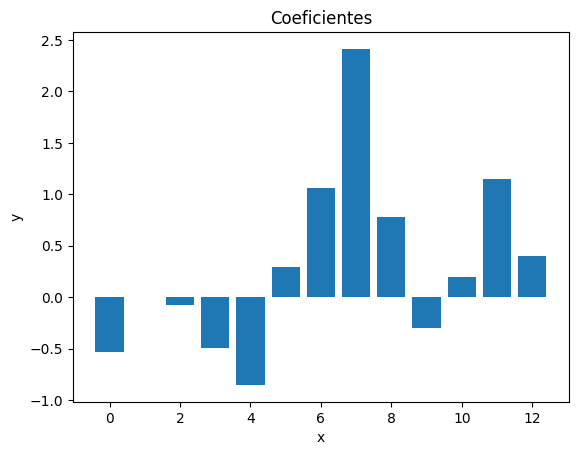

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [45]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.28866221e-01, 1.42857143e-01],
       [0.00000000e+00, 3.13176078e-13, 0.00000000e+00, ...,
        0.00000000e+00, 5.92142335e-01, 2.85714286e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.33333333e-01, 3.25391181e-01, 4.76190476e-02],
       ...,
       [8.19344262e-01, 8.18510080e-01, 6.01126727e-02, ...,
        0.00000000e+00, 6.12971776e-01, 2.85714286e-01],
       [6.45573770e-01, 8.20298865e-01, 7.29390442e-02, ...,
        6.66666667e-01, 6.83183183e-01, 3.80952381e-01],
       [0.00000000e+00, 3.13176078e-13, 0.00000000e+00, ...,
        0.00000000e+00, 7.86780787e-01, 3.33333333e-01]])

In [46]:
X_test.shape

(800, 13)

In [47]:
predictions = model.predict(X_test)

In [48]:
print(confusion_matrix(y_test, predictions))

[[230 160]
 [139 271]]


In [49]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.63
precision:  0.63
recall 0.66
f1_score:  0.64
matthews_score:  0.25


In [50]:
X_train.shape

(800, 13)

In [51]:
X_test.shape

(800, 13)

In [52]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [53]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [55]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.670000 (0.101942)
Logistic Regression Precision:: 0.690000 (0.120368)
Logistic Regression Recall:: 0.690000 (0.178303)
Logistic Regression F1-score:: 0.670000 (0.108893)


In [56]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.310000 (0.218883)


In [57]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [58]:
#linear_model

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       390
           1       0.63      0.66      0.64       410

    accuracy                           0.63       800
   macro avg       0.63      0.63      0.63       800
weighted avg       0.63      0.63      0.63       800



In [61]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [62]:
test.columns[:-1]

Index(['entropias', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_bigram', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'c_estructura',
       'Jaro-Winkler_contra', 'c1_estructura', 'Jaro-Winkler_relacionadas',
       'c2_estructura'],
      dtype='object')

In [63]:
explainer.expected_value

-0.1144474556772952

In [64]:
X_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.28866221e-01, 1.42857143e-01],
       [0.00000000e+00, 3.13176078e-13, 0.00000000e+00, ...,
        0.00000000e+00, 5.92142335e-01, 2.85714286e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.33333333e-01, 3.25391181e-01, 4.76190476e-02],
       ...,
       [8.19344262e-01, 8.18510080e-01, 6.01126727e-02, ...,
        0.00000000e+00, 6.12971776e-01, 2.85714286e-01],
       [6.45573770e-01, 8.20298865e-01, 7.29390442e-02, ...,
        6.66666667e-01, 6.83183183e-01, 3.80952381e-01],
       [0.00000000e+00, 3.13176078e-13, 0.00000000e+00, ...,
        0.00000000e+00, 7.86780787e-01, 3.33333333e-01]])

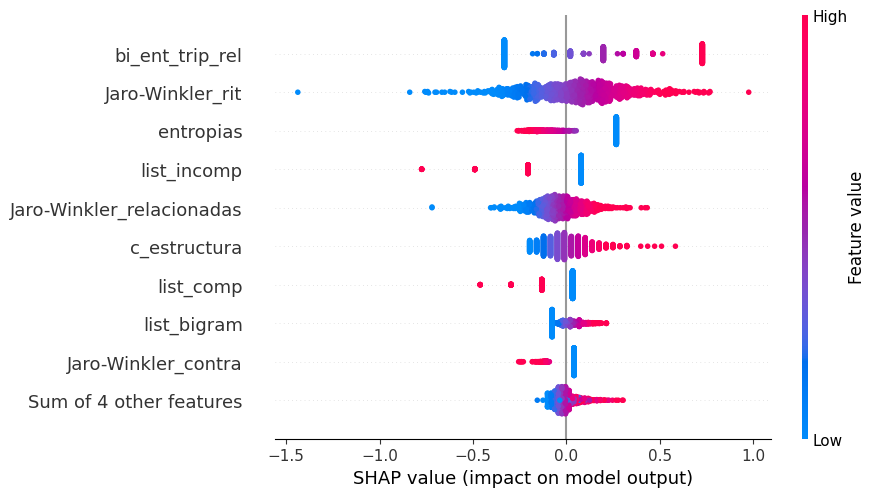

In [65]:
shap.plots.beeswarm(shap_values)

[0.19567225 0.07878892 0.55       0.76360656 0.82276753 0.04861899
 0.         0.         0.2        0.66666667 0.86666667 0.05263158
 0.         0.         0.         0.        ] 0 1


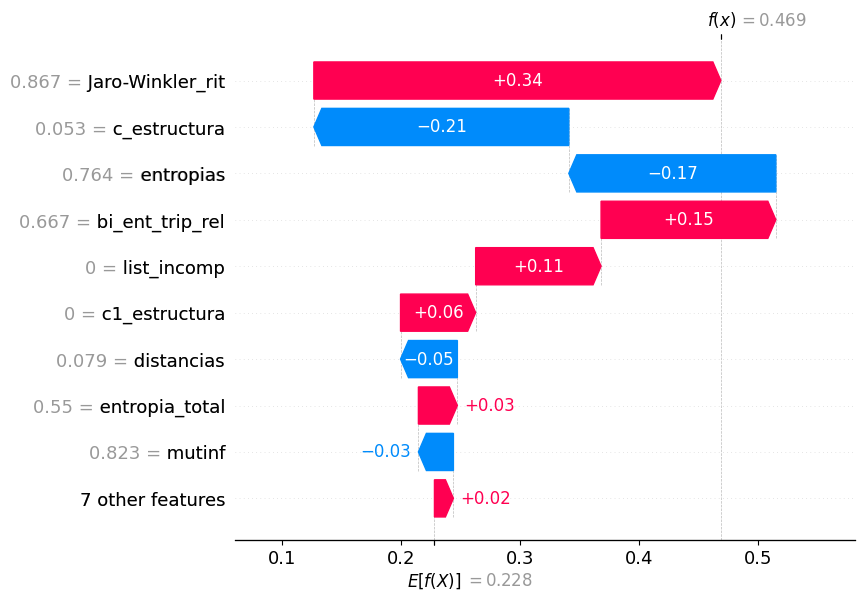

In [137]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [138]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73651316 0.         0.         0.
 0.         0.         0.33333333 0.66666667 0.92857143 0.
 0.         0.         0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

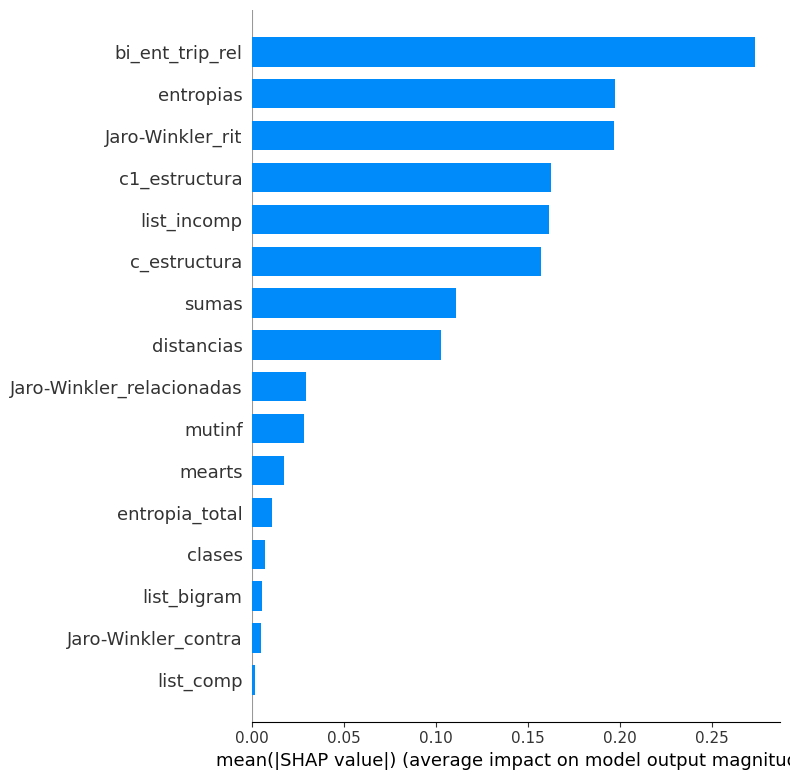

In [264]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

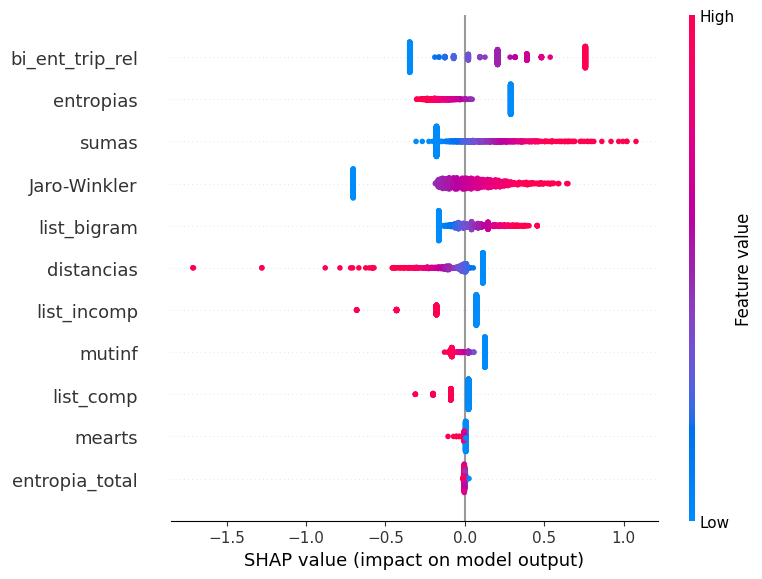

In [67]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

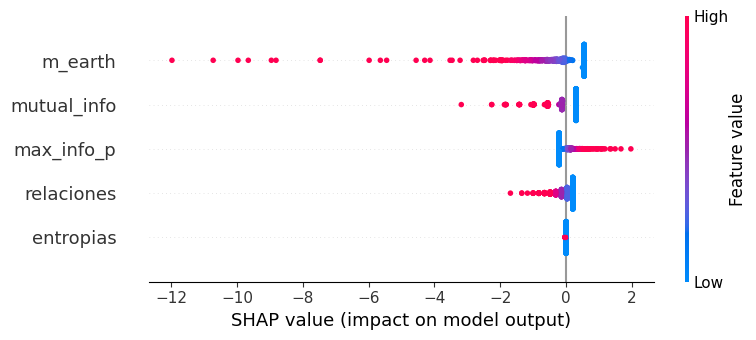

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

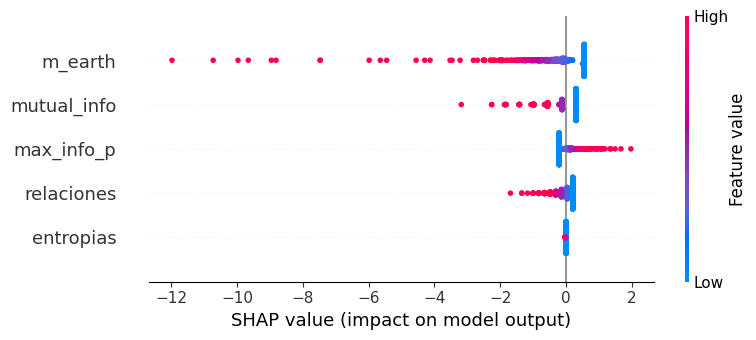

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


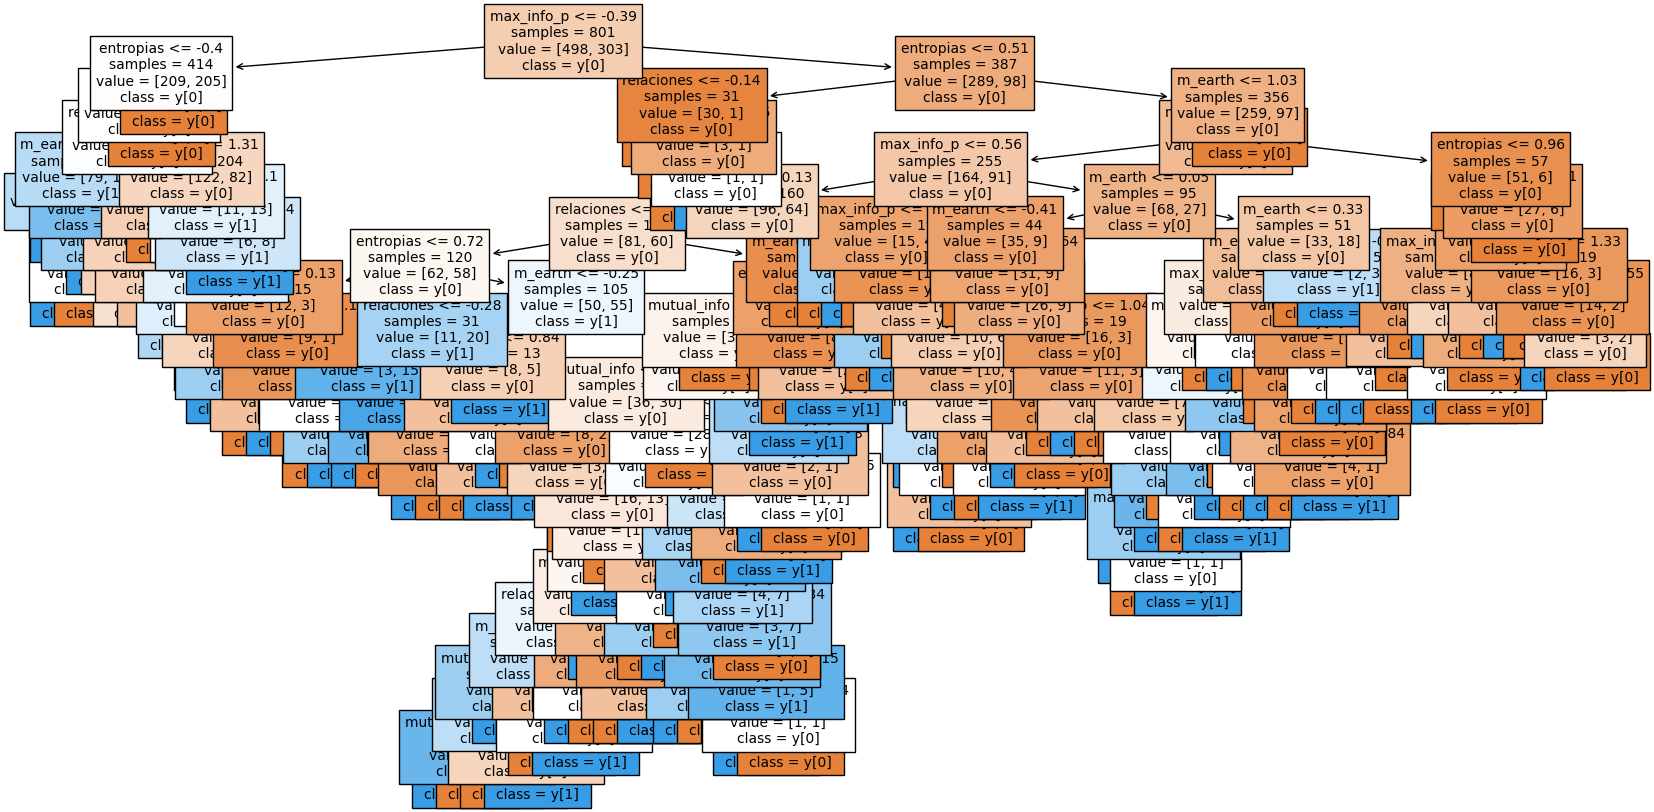

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )